In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
output_path = "../data/03_processed/merged_df.csv"
merged_df = pd.read_csv(output_path)
merged_df = merged_df.rename(columns={'total_year': 'HDD_total_year'})

# GDP per capita
merged_df['GDP_per_capita'] = merged_df['GDP_2022'] / merged_df['Population_2023']

# Delete Taiwan (temporal)
merged_df = merged_df[merged_df['Country'] != 'Taiwan']

np.random.seed(123)
merged_df['is_train'] = np.random.choice([1, 0], size=len(merged_df), p=[0.8, 0.2])



In [3]:
features = [
    "hdd_total_year", 
    "cdd_total_year", 
    "GDP_per_capita", 
    "Urbanization_Rate_2022",
    "latitude",
    "longitude",  
    "Paris_Agreement",
    "Subnational HDI", 
    "Educational index", 
    "Income index",
    "2m_temperature_2023_avg",
    "2m_dewpoint_temperature_2023_avg",
    "total_precipitation_2023",
    "longitude_sin", 
    "longitude_cos", 
    "latitude_sin", 
    "latitude_cos",  
    "population_density"
]

feature_abbreviations = {
    "hdd_total_year": "HDD",
    "cdd_total_year": "CDD", 
    "GDP_per_capita": "GDP",
    "Urbanization_Rate_2022": "URB",
    "latitude": "Lat",
    "longitude": "Long",
    "Paris_Agreement": "Paris",
    "Subnational HDI": "HDI", 
    "Educational index": "EDU" , 
    "Income index": "Income",
    "2m_temperature_2023_avg": "Temp",
    "2m_dewpoint_temperature_2023_avg": "Dew",
    "total_precipitation_2023": "Precip",
    "longitude_sin": "Long_Sin", 
    "longitude_cos": "Long_Cos", 
    "latitude_sin": "Lat_Sin", 
    "latitude_cos": "Lat_Cos",  
    "population_density": "Pop_Dens"
}

target_columns = [
    "Residential EUI (kWh/m2/year)",
    "Non-residential EUI (kWh/m2/year)"
]

merged_df['EUI (kWh/m2/year)'] = merged_df[target_columns[0]] + merged_df[target_columns[1]]

In [4]:
# Function to calculate feature importance and return the importance table --> (THIS IS THE INPUT FOR THE PLOT)


def calculate_feature_importance(df, features, target_columns, feature_abbreviations):
    # Create the sum of the target columns
    total_eui = df[target_columns[0]] + df[target_columns[1]]
    
    # Prepare data
    X = df[features]
    y = total_eui
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Scale target (optional, but recommended for interpretation)
    y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1)).ravel()
    
    # Train model
    model = LinearRegression()
    model.fit(X_scaled, y_scaled)
    
    # Get feature importance (absolute coefficients)
    importance = np.abs(model.coef_)
    
    # Create DataFrame with importance
    importance_df = pd.DataFrame({
        'Feature': [feature_abbreviations.get(f, f) for f in features],
        'Importance': importance
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=True)
    
    return importance_df


importance_df = calculate_feature_importance(merged_df, features, target_columns, feature_abbreviations)
importance_df.sort_values('Importance', ascending=False)


,Feature,Importance
4,Lat,3.771003
15,Lat_Sin,3.443787
7,HDI,0.333678
0,HDD,0.270096
10,Temp,0.225209
5,Long,0.218950
16,Lat_Cos,0.208355
8,EDU,0.184285
13,Long_Sin,0.162154
11,Dew,0.082213


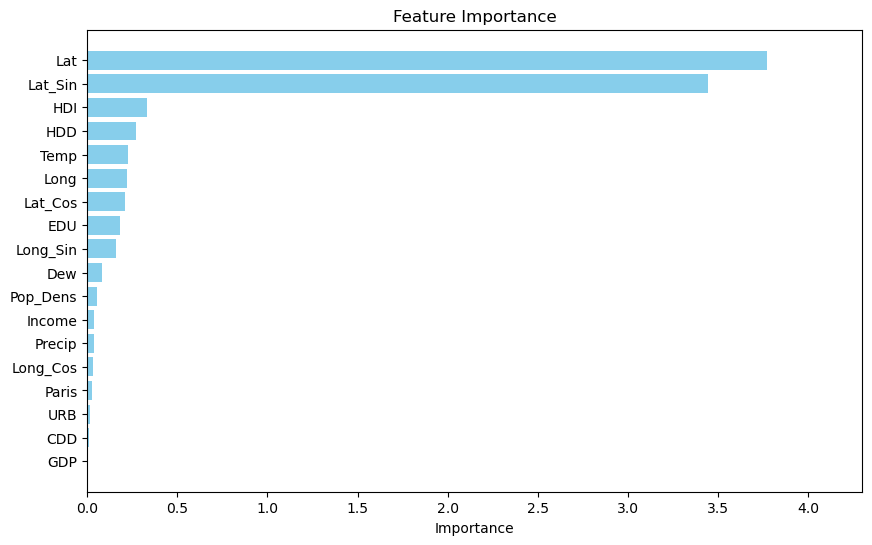

In [5]:

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.xlim(0, 4.3) 
plt.show()
